In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import scipy
from scipy.stats import boxcox
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
from itertools import combinations
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams["svg.fonttype"] = "none"


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mizbili\AppData\Local\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.





Summary of the MLMR no BoxCox transformation
                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        AIS_dist   
No. Observations:          4531           Method:                    REML       
No. Groups:                49             Scale:                     14.3982    
Min. group size:           13             Log-Likelihood:            -12513.0782
Max. group size:           208            Converged:                 Yes        
Mean group size:           92.5                                                 
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              4.523    0.334 13.556 0.000  3.869  5.177
C(Slice_Condition_Sex)[T.IONL_Male]   -0.087    0.437 -0.198 0.843 -0.944  0.771
C(S

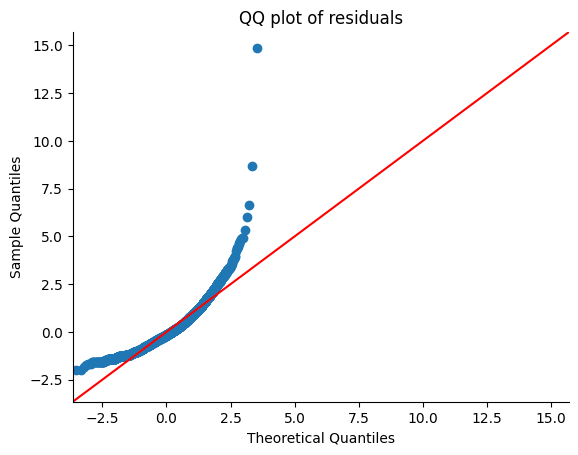



Summary of the MLMR with BoxCox transformation
                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        AIS_dist_bc
No. Observations:          4531           Method:                    REML       
No. Groups:                49             Scale:                     3.0699     
Min. group size:           13             Log-Likelihood:            -9016.5351 
Max. group size:           208            Converged:                 Yes        
Mean group size:           92.5                                                 
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              1.760    0.160 11.023 0.000  1.447  2.073
C(Slice_Condition_Sex)[T.IONL_Male]   -0.017    0.209 -0.080 0.937 -0.427  0.394
C

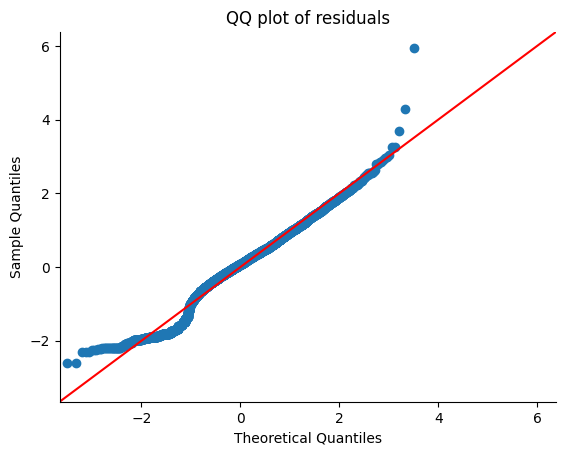

Estimated marginal means Box-Cox scale(fixed effects):
SHAM_Male: 1.7603734037790142
IONL_Male: 1.743721995427456
SHAM_Female: 2.2949026006920894
IONL_Female: 1.6626592129125428

Pairwise comparisons:
Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant
SHAM_Male vs IONL_Male | 0.0167 | 0.2093 | 0.080 | 0.9366 | 0.9366 | False
SHAM_Male vs SHAM_Female | -0.5345 | 0.2154 | -2.481 | 0.0131 | 0.0263 | True
SHAM_Male vs IONL_Female | 0.0977 | 0.1997 | 0.489 | 0.6247 | 0.7850 | False
IONL_Male vs SHAM_Female | -0.5512 | 0.1981 | -2.782 | 0.0054 | 0.0163 | True
IONL_Male vs IONL_Female | 0.0811 | 0.1809 | 0.448 | 0.6541 | 0.7850 | False
SHAM_Female vs IONL_Female | 0.6322 | 0.1878 | 3.366 | 0.0008 | 0.0046 | True


Figure AIS_dist mean per slice



C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\498211513.py:156: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_dist', errorbar='se', errcolor='k',
C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\498211513.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_dist',


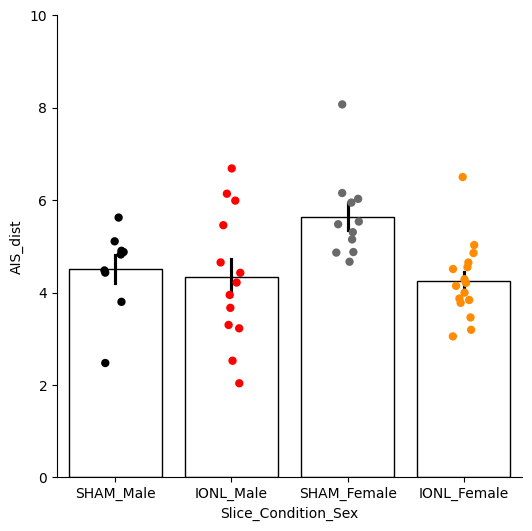

r2 regression SHAM male:  0.7279566365622748
p value SHAM male:  0.0034464609302604977
r2 regression IONL male:  0.12068620382163897
p value IONL male:  0.24481525626803408


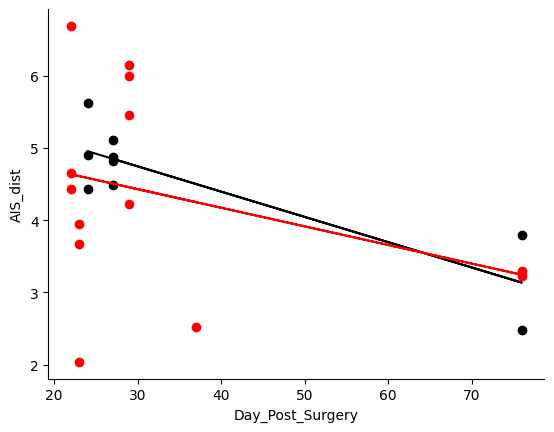

r2 regression SHAM female:  0.11276658265155982
p value SHAM female:  0.31267569792713473
r2 regression IONL female:  0.0010723691391262863
p value IONL female:  0.9041710828162867


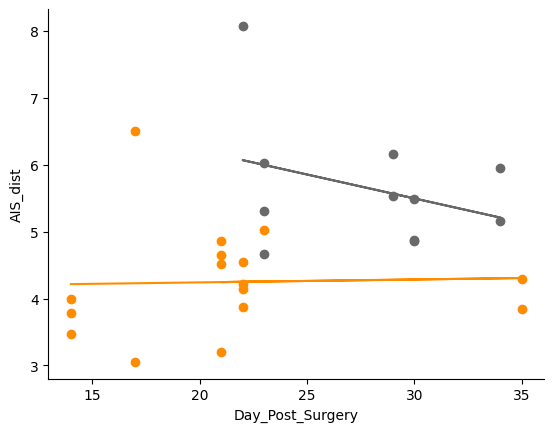

In [2]:
#stats AIS_dist

df_stats_ais=pd.read_csv("AIS_dataframe.csv")

df_taken=df_stats_ais.copy()
param='AIS_dist'

print()
print()
print('Summary of the MLMR no BoxCox transformation')
df_taken["Slice_Condition_Sex"] = pd.Categorical(df_taken["Slice_Condition_Sex"], categories=["SHAM_Male","IONL_Male","SHAM_Female","IONL_Female"])
model = mixedlm(
    param + " ~ C(Slice_Condition_Sex)",  # fixed effects
    data=df_taken,
    groups=df_taken["Slice_Name"],         # random intercepts per patient
    vc_formula={"Animal_Name": "0 + C(Animal_Name)"}
)
result = model.fit()
print(result.summary())

# Add residuals and fitted values to your dataframe
df_taken["residuals"] = result.resid
df_taken["fitted"] = result.fittedvalues

# QQ plot of residuals
print()
print()
print('QQ plot no BoxCox transformation')
sm.qqplot(df_taken["residuals"], line="45", fit = True)
plt.title("QQ plot of residuals")
plt.show()



c_boxcox=0.1
data_pos = df_taken[param] + c_boxcox
bc_transformed, fitted_lambda = boxcox(data_pos)
df_taken[param + "_bc"] = bc_transformed

print()
print()
print('Summary of the MLMR with BoxCox transformation')
df_taken["Slice_Condition_Sex"] = pd.Categorical(df_taken["Slice_Condition_Sex"], categories=["SHAM_Male","IONL_Male","SHAM_Female","IONL_Female"])
model = mixedlm(
    param + "_bc" + " ~ C(Slice_Condition_Sex)",  # fixed effects
    data=df_taken,
    groups=df_taken["Slice_Name"],         # random intercepts per patient
    vc_formula={"Animal_Name": "0 + C(Animal_Name)"}
)
result = model.fit()
print(result.summary())
    
# Add residuals and fitted values to your dataframe
df_taken["residuals"] = result.resid
df_taken["fitted"] = result.fittedvalues

# QQ plot of residuals
print()
print()
print('QQ plot with BoxCox transformation')
sm.qqplot(df_taken["residuals"], line="45", fit = True)
plt.title("QQ plot of residuals")
plt.show()
    
# Get the fixed effect estimates:
fe_params = result.params.filter(like="C(Slice_Condition_Sex)")

# The base (reference) category intercept:
intercept = result.params["Intercept"]

# Extract all category names:
categories = df_taken["Slice_Condition_Sex"].astype("category").cat.categories.tolist()

# Construct estimated marginal means (group means) from params:
# The reference category mean is intercept, others = intercept + coef
marginal_means = {categories[0]: intercept}  # reference level

for cat in categories[1:]:
    coef_name = f"C(Slice_Condition_Sex)[T.{cat}]"
    marginal_means[cat] = intercept + fe_params.get(coef_name, 0)

print("Estimated marginal means Box-Cox scale(fixed effects):")
for k, v in marginal_means.items():
    print(f"{k}: {v}")

# Now compute all pairwise differences and p-values using covariance matrix and t-distribution
cov = result.cov_params()

def get_se_diff(cat1, cat2):
    # Variance of difference Var(b1 - b2) = Var(b1) + Var(b2) - 2*Cov(b1,b2)
    # "Intercept" is included, handle differences with intercept carefully
    
    if cat1 == categories[0] and cat2 == categories[0]:
        return 0  # same group
    elif cat1 == categories[0]:
        # difference = Intercept - (Intercept + b_cat2) = -b_cat2
        param = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var_diff = cov.loc[param, param]
    elif cat2 == categories[0]:
        # difference = (Intercept + b_cat1) - Intercept = b_cat1
        param = f"C(Slice_Condition_Sex)[T.{cat1}]"
        var_diff = cov.loc[param, param]
    else:
        param1 = f"C(Slice_Condition_Sex)[T.{cat1}]"
        param2 = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var1 = cov.loc[param1, param1]
        var2 = cov.loc[param2, param2]
        cov12 = cov.loc[param1, param2]
        var_diff = var1 + var2 - 2*cov12

    return np.sqrt(var_diff)
        
alpha = 0.05
df_resid = result.df_resid if hasattr(result, "df_resid") else result.nobs - len(result.params)

pairwise_results = []

for cat1, cat2 in combinations(categories, 2):
    diff = marginal_means[cat1] - marginal_means[cat2]
    se_diff = get_se_diff(cat1, cat2)
    t_stat = diff / se_diff
    
    # Two-sided p-value from t-distribution
    pval = 2 * scipy.stats.t.sf(np.abs(t_stat), df=df_resid)
    
    pairwise_results.append((cat1, cat2, diff, se_diff, t_stat, pval))

# Multiple testing correction (e.g., Benjamini-Hochberg FDR)
pvals = [x[5] for x in pairwise_results]
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=alpha, method="fdr_bh")

print("\nPairwise comparisons:")
print("Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant")
for i, (cat1, cat2, diff, se_diff, t_stat, pval) in enumerate(pairwise_results):
    print(f"{cat1} vs {cat2} | {diff:.4f} | {se_diff:.4f} | {t_stat:.3f} | {pval:.4f} | {pvals_corrected[i]:.4f} | {reject[i]}")




#Build Figures AIS_dist
print()
print()
print('Figure AIS_dist mean per slice')
print()
agg_dict = {}
for col in df_taken.columns:
    if df_taken[col].dtype.kind in 'biufc':   # Numeric types
        agg_dict[col] = 'mean'
    elif col != 'Slice_Name':
        agg_dict[col] = 'first'          # Or another aggregation you want

df_taken_mean = df_taken.groupby('Slice_Name', as_index=False).agg(agg_dict)

plt.figure(figsize=(6,6))
# Bar plot (mean + error bars)
seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_dist', errorbar='se', errcolor='k', 
                order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                facecolor=[0,0,0,0], edgecolor='black')
# Overlay scatter plot for individual points
seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_dist',
                  order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                  palette=['k','r','dimgrey','darkorange'], size=6, jitter=True)
plt.ylabel("AIS_dist")
plt.ylim(0,10)
plt.savefig('AIS_dist_male_female.svg', bbox_inches='tight')
plt.show()




sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_dist']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM male: ', res.rvalue**2)
print('p value SHAM male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_dist'],'o',color='k')
plt.plot(x, res.intercept + res.slope*x, 'k',label='SHAM_Male')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_dist']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL male: ', res.rvalue**2)
print('p value IONL male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_dist'],'o',color='r')
plt.plot(x, res.intercept + res.slope*x, 'r',label='IONL_Male')
plt.ylabel('AIS_dist')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_dist_male.svg')
plt.show()

sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_dist']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM female: ', res.rvalue**2)
print('p value SHAM female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_dist'],'o',color='dimgrey')
plt.plot(x, res.intercept + res.slope*x, 'dimgrey',label='SHAM_Female')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_dist']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL female: ', res.rvalue**2)
print('p value IONL female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_dist'],'o',color='darkorange')
plt.plot(x, res.intercept + res.slope*x, 'darkorange',label='IONL_Female')
plt.ylabel('AIS_dist')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_dist_female.svg')
plt.show()



Summary of the MLMR no BoxCox transformation
                     Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        AIS_length 
No. Observations:          4531           Method:                    REML       
No. Groups:                49             Scale:                     30.6991    
Min. group size:           13             Log-Likelihood:            -14253.8785
Max. group size:           208            Converged:                 Yes        
Mean group size:           92.5                                                 
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                             22.167    0.895 24.779 0.000 20.413 23.920
C(Slice_Condition_Sex)[T.IONL_Male]    4.611    1.166  3.953 0.000  2.325  6.897
C(S

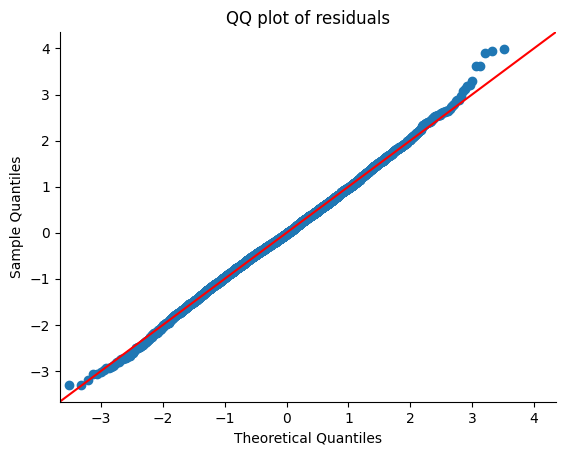

Estimated marginal means Box-Cox scale(fixed effects):
SHAM_Male: 22.166717333586714
IONL_Male: 26.777298104295618
SHAM_Female: 22.403941033357793
IONL_Female: 25.049096904711888

Pairwise comparisons:
Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant
SHAM_Male vs IONL_Male | -4.6106 | 1.1663 | -3.953 | 0.0001 | 0.0002 | True
SHAM_Male vs SHAM_Female | -0.2372 | 1.2062 | -0.197 | 0.8441 | 0.8441 | False
SHAM_Male vs IONL_Female | -2.8824 | 1.1196 | -2.574 | 0.0101 | 0.0180 | True
IONL_Male vs SHAM_Female | 4.3734 | 1.1023 | 3.968 | 0.0001 | 0.0002 | True
IONL_Male vs IONL_Female | 1.7282 | 1.0069 | 1.716 | 0.0862 | 0.1034 | False
SHAM_Female vs IONL_Female | -2.6452 | 1.0529 | -2.512 | 0.0120 | 0.0180 | True


Figure AIS_length mean per slice



C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\195813143.py:123: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_length', errorbar='se', errcolor='k',
C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\195813143.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_length',


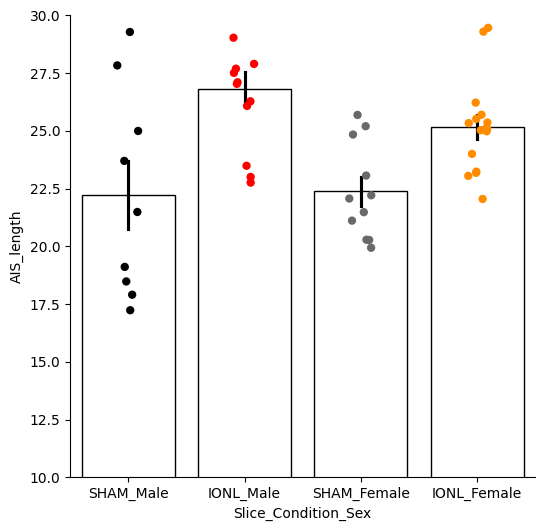

r2 regression SHAM male:  0.2487033264615679
p value SHAM male:  0.17176193034225443
r2 regression IONL male:  0.29083714255641163
p value IONL male:  0.0571749052415792


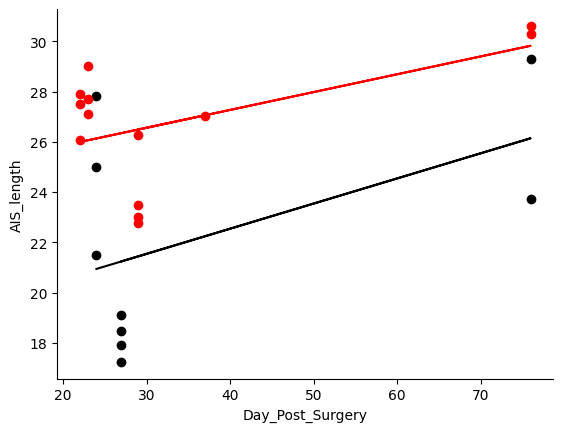

r2 regression SHAM female:  0.0952065851753598
p value SHAM female:  0.3559059186434925
r2 regression IONL female:  0.02587690808515414
p value IONL female:  0.5517405491921417


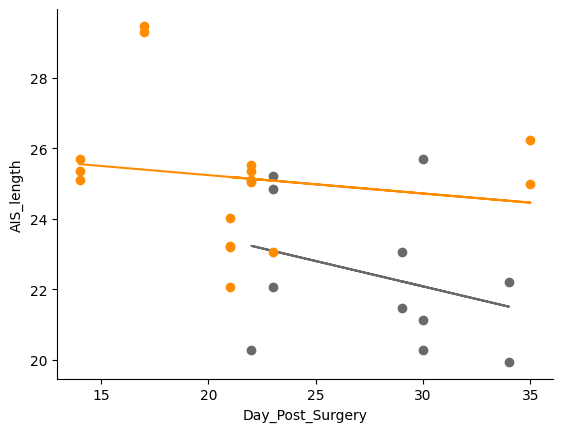

In [3]:
#stats AIS_length

df_stats_ais=pd.read_csv("AIS_dataframe.csv")

df_taken=df_stats_ais.copy()
param='AIS_length'

print()
print()
print('Summary of the MLMR no BoxCox transformation')
df_taken["Slice_Condition_Sex"] = pd.Categorical(df_taken["Slice_Condition_Sex"], categories=["SHAM_Male","IONL_Male","SHAM_Female","IONL_Female"])
model = mixedlm(
    param + " ~ C(Slice_Condition_Sex)",  # fixed effects
    data=df_taken,
    groups=df_taken["Slice_Name"],         # random intercepts per patient
    vc_formula={"Animal_Name": "0 + C(Animal_Name)"}
)
result = model.fit()
print(result.summary())

# Add residuals and fitted values to your dataframe
df_taken["residuals"] = result.resid
df_taken["fitted"] = result.fittedvalues

# QQ plot of residuals
print()
print()
print('QQ plot no BoxCox transformation')
sm.qqplot(df_taken["residuals"], line="45", fit = True)
plt.title("QQ plot of residuals")
plt.show()
    
# Get the fixed effect estimates:
fe_params = result.params.filter(like="C(Slice_Condition_Sex)")

# The base (reference) category intercept:
intercept = result.params["Intercept"]

# Extract all category names:
categories = df_taken["Slice_Condition_Sex"].astype("category").cat.categories.tolist()

# Construct estimated marginal means (group means) from params:
# The reference category mean is intercept, others = intercept + coef
marginal_means = {categories[0]: intercept}  # reference level

for cat in categories[1:]:
    coef_name = f"C(Slice_Condition_Sex)[T.{cat}]"
    marginal_means[cat] = intercept + fe_params.get(coef_name, 0)

print("Estimated marginal means Box-Cox scale(fixed effects):")
for k, v in marginal_means.items():
    print(f"{k}: {v}")

# Now compute all pairwise differences and p-values using covariance matrix and t-distribution
cov = result.cov_params()

def get_se_diff(cat1, cat2):
    # Variance of difference Var(b1 - b2) = Var(b1) + Var(b2) - 2*Cov(b1,b2)
    # "Intercept" is included, handle differences with intercept carefully
    
    if cat1 == categories[0] and cat2 == categories[0]:
        return 0  # same group
    elif cat1 == categories[0]:
        # difference = Intercept - (Intercept + b_cat2) = -b_cat2
        param = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var_diff = cov.loc[param, param]
    elif cat2 == categories[0]:
        # difference = (Intercept + b_cat1) - Intercept = b_cat1
        param = f"C(Slice_Condition_Sex)[T.{cat1}]"
        var_diff = cov.loc[param, param]
    else:
        param1 = f"C(Slice_Condition_Sex)[T.{cat1}]"
        param2 = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var1 = cov.loc[param1, param1]
        var2 = cov.loc[param2, param2]
        cov12 = cov.loc[param1, param2]
        var_diff = var1 + var2 - 2*cov12

    return np.sqrt(var_diff)
        
alpha = 0.05
df_resid = result.df_resid if hasattr(result, "df_resid") else result.nobs - len(result.params)

pairwise_results = []

for cat1, cat2 in combinations(categories, 2):
    diff = marginal_means[cat1] - marginal_means[cat2]
    se_diff = get_se_diff(cat1, cat2)
    t_stat = diff / se_diff
    
    # Two-sided p-value from t-distribution
    pval = 2 * scipy.stats.t.sf(np.abs(t_stat), df=df_resid)
    
    pairwise_results.append((cat1, cat2, diff, se_diff, t_stat, pval))

# Multiple testing correction (e.g., Benjamini-Hochberg FDR)
pvals = [x[5] for x in pairwise_results]
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=alpha, method="fdr_bh")

print("\nPairwise comparisons:")
print("Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant")
for i, (cat1, cat2, diff, se_diff, t_stat, pval) in enumerate(pairwise_results):
    print(f"{cat1} vs {cat2} | {diff:.4f} | {se_diff:.4f} | {t_stat:.3f} | {pval:.4f} | {pvals_corrected[i]:.4f} | {reject[i]}")



#Build Figures AIS_length
print()
print()
print('Figure AIS_length mean per slice')
print()
agg_dict = {}
for col in df_taken.columns:
    if df_taken[col].dtype.kind in 'biufc':   # Numeric types
        agg_dict[col] = 'mean'
    elif col != 'Slice_Name':
        agg_dict[col] = 'first'          # Or another aggregation you want

df_taken_mean = df_taken.groupby('Slice_Name', as_index=False).agg(agg_dict)

plt.figure(figsize=(6,6))
# Bar plot (mean + error bars)
seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_length', errorbar='se', errcolor='k', 
                order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                facecolor=[0,0,0,0], edgecolor='black')
# Overlay scatter plot for individual points
seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='AIS_length',
                  order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                  palette=['k','r','dimgrey','darkorange'], size=6, jitter=True)
plt.ylabel("AIS_length")
plt.ylim(10,30)
plt.savefig('AIS_length_male_female.svg', bbox_inches='tight')
plt.show()




sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_length']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM male: ', res.rvalue**2)
print('p value SHAM male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_length'],'o',color='k')
plt.plot(x, res.intercept + res.slope*x, 'k',label='SHAM__Male')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_length']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL male: ', res.rvalue**2)
print('p value IONL male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_length'],'o',color='r')
plt.plot(x, res.intercept + res.slope*x, 'r',label='IONL_Male')
plt.ylabel('AIS_length')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_length_male.svg')
plt.show()

sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_length']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM female: ', res.rvalue**2)
print('p value SHAM female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_length'],'o',color='dimgrey')
plt.plot(x, res.intercept + res.slope*x, 'dimgrey',label='SHAM_Female')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['AIS_length']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL female: ', res.rvalue**2)
print('p value IONL female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['AIS_length'],'o',color='darkorange')
plt.plot(x, res.intercept + res.slope*x, 'darkorange',label='IONL_Female')
plt.ylabel('AIS_length')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_length_female.svg')
plt.show()





Summary of the MLMR no BoxCox transformation
                       Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         Soma_area  
No. Observations:           5811            Method:                     REML       
No. Groups:                 50              Scale:                      4269.6629  
Min. group size:            17              Log-Likelihood:             -32580.3778
Max. group size:            339             Converged:                  Yes        
Mean group size:            116.2                                                  
-----------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                             146.260    7.407 19.745 0.000 131.742 160.778
C(Slice_Condition_Sex)[T.IONL_Male]   -23.384    9.4

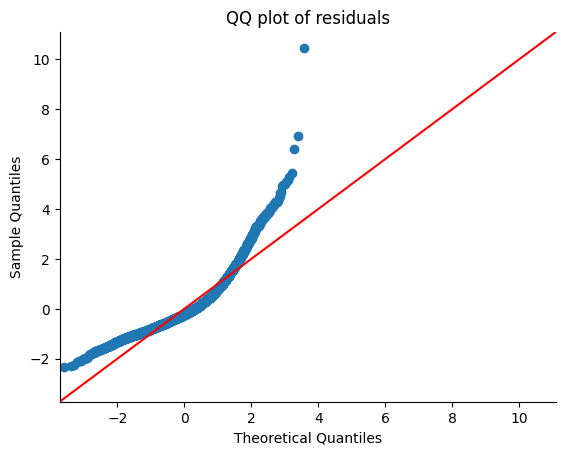



Summary of the MLMR with BoxCox transformation
                     Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        Soma_area_bc
No. Observations:         5811           Method:                    REML        
No. Groups:               50             Scale:                     0.3276      
Min. group size:          17             Log-Likelihood:            -5070.6292  
Max. group size:          339            Converged:                 Yes         
Mean group size:          116.2                                                 
--------------------------------------------------------------------------------
                                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                              4.899    0.067 73.145 0.000  4.768  5.031
C(Slice_Condition_Sex)[T.IONL_Male]   -0.170    0.086 -1.986 0.047 -0.339 -0.002
C

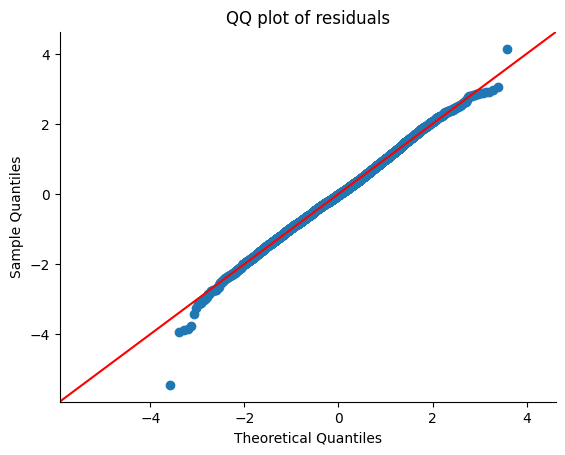

Estimated marginal means Box-Cox scale(fixed effects):
SHAM_Male: 4.899430595623311
IONL_Male: 4.728992518676201
SHAM_Female: 4.530018207130325
IONL_Female: 4.441980624856394

Pairwise comparisons:
Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant
SHAM_Male vs IONL_Male | 0.1704 | 0.0858 | 1.986 | 0.0471 | 0.0565 | False
SHAM_Male vs SHAM_Female | 0.3694 | 0.0905 | 4.082 | 0.0000 | 0.0001 | True
SHAM_Male vs IONL_Female | 0.4574 | 0.0833 | 5.495 | 0.0000 | 0.0000 | True
IONL_Male vs SHAM_Female | 0.1990 | 0.0811 | 2.453 | 0.0142 | 0.0213 | True
IONL_Male vs IONL_Female | 0.2870 | 0.0730 | 3.934 | 0.0001 | 0.0002 | True
SHAM_Female vs IONL_Female | 0.0880 | 0.0784 | 1.123 | 0.2616 | 0.2616 | False


Figure Soma_area mean per slice



C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\2386576748.py:154: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'k'}` instead.

  seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='Soma_area', errorbar='se', errcolor='k',
C:\Users\mizbili\AppData\Local\Temp\ipykernel_5624\2386576748.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='Soma_area',


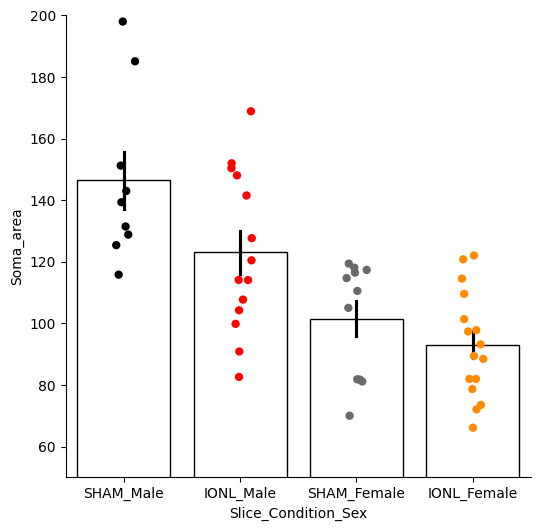

r2 regression SHAM male:  0.0372816724368909
p value SHAM male:  0.6186677066642179
r2 regression IONL male:  1.618935109450554e-05
p value IONL male:  0.9891082849208377


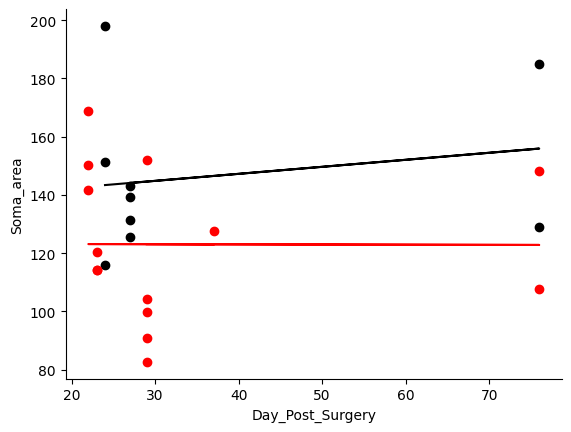

r2 regression SHAM female:  0.1285929336598163
p value SHAM female:  0.27882987362236533
r2 regression IONL female:  0.23782520566188764
p value IONL female:  0.05533744125199992


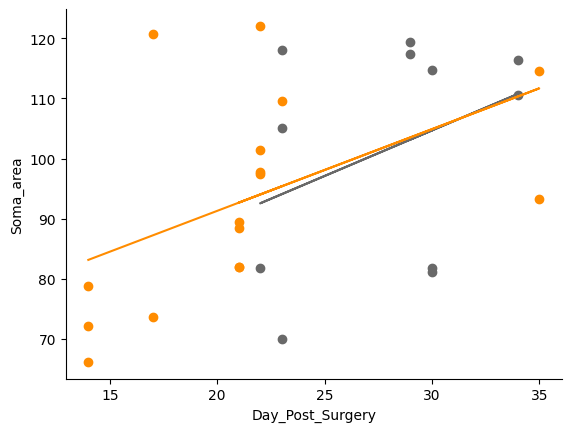

In [4]:
#stats Soma_area

df_stats_soma=pd.read_csv("Soma_area_dataframe.csv")

df_taken=df_stats_soma.copy()
param='Soma_area'

print()
print()
print('Summary of the MLMR no BoxCox transformation')
df_taken["Slice_Condition_Sex"] = pd.Categorical(df_taken["Slice_Condition_Sex"], categories=["SHAM_Male","IONL_Male","SHAM_Female","IONL_Female"])
model = mixedlm(
    param + " ~ C(Slice_Condition_Sex)",  # fixed effects
    data=df_taken,
    groups=df_taken["Slice_Name"],         # random intercepts per patient
    vc_formula={"Animal_Name": "0 + C(Animal_Name)"}
)
result = model.fit()
print(result.summary())

# Add residuals and fitted values to your dataframe
df_taken["residuals"] = result.resid
df_taken["fitted"] = result.fittedvalues

# QQ plot of residuals
print()
print()
print('QQ plot no BoxCox transformation')
sm.qqplot(df_taken["residuals"], line="45", fit = True)
plt.title("QQ plot of residuals")
plt.show()



c_boxcox=0.1
data_pos = df_taken[param] + c_boxcox
bc_transformed, fitted_lambda = boxcox(data_pos)
df_taken[param + "_bc"] = bc_transformed

print()
print()
print('Summary of the MLMR with BoxCox transformation')
df_taken["Slice_Condition_Sex"] = pd.Categorical(df_taken["Slice_Condition_Sex"], categories=["SHAM_Male","IONL_Male","SHAM_Female","IONL_Female"])
model = mixedlm(
    param + "_bc" + " ~ C(Slice_Condition_Sex)",  # fixed effects
    data=df_taken,
    groups=df_taken["Slice_Name"],         # random intercepts per patient
    vc_formula={"Animal_Name": "0 + C(Animal_Name)"}
)
result = model.fit()
print(result.summary())
    
# Add residuals and fitted values to your dataframe
df_taken["residuals"] = result.resid
df_taken["fitted"] = result.fittedvalues

# QQ plot of residuals
print()
print()
print('QQ plot with BoxCox transformation')
sm.qqplot(df_taken["residuals"], line="45", fit = True)
plt.title("QQ plot of residuals")
plt.show()
    
# Get the fixed effect estimates:
fe_params = result.params.filter(like="C(Slice_Condition_Sex)")

# The base (reference) category intercept:
intercept = result.params["Intercept"]

# Extract all category names:
categories = df_taken["Slice_Condition_Sex"].astype("category").cat.categories.tolist()

# Construct estimated marginal means (group means) from params:
# The reference category mean is intercept, others = intercept + coef
marginal_means = {categories[0]: intercept}  # reference level

for cat in categories[1:]:
    coef_name = f"C(Slice_Condition_Sex)[T.{cat}]"
    marginal_means[cat] = intercept + fe_params.get(coef_name, 0)

print("Estimated marginal means Box-Cox scale(fixed effects):")
for k, v in marginal_means.items():
    print(f"{k}: {v}")

# Now compute all pairwise differences and p-values using covariance matrix and t-distribution
cov = result.cov_params()

def get_se_diff(cat1, cat2):
    # Variance of difference Var(b1 - b2) = Var(b1) + Var(b2) - 2*Cov(b1,b2)
    # "Intercept" is included, handle differences with intercept carefully
    
    if cat1 == categories[0] and cat2 == categories[0]:
        return 0  # same group
    elif cat1 == categories[0]:
        # difference = Intercept - (Intercept + b_cat2) = -b_cat2
        param = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var_diff = cov.loc[param, param]
    elif cat2 == categories[0]:
        # difference = (Intercept + b_cat1) - Intercept = b_cat1
        param = f"C(Slice_Condition_Sex)[T.{cat1}]"
        var_diff = cov.loc[param, param]
    else:
        param1 = f"C(Slice_Condition_Sex)[T.{cat1}]"
        param2 = f"C(Slice_Condition_Sex)[T.{cat2}]"
        var1 = cov.loc[param1, param1]
        var2 = cov.loc[param2, param2]
        cov12 = cov.loc[param1, param2]
        var_diff = var1 + var2 - 2*cov12

    return np.sqrt(var_diff)
        
alpha = 0.05
df_resid = result.df_resid if hasattr(result, "df_resid") else result.nobs - len(result.params)

pairwise_results = []

for cat1, cat2 in combinations(categories, 2):
    diff = marginal_means[cat1] - marginal_means[cat2]
    se_diff = get_se_diff(cat1, cat2)
    t_stat = diff / se_diff
    
    # Two-sided p-value from t-distribution
    pval = 2 * scipy.stats.t.sf(np.abs(t_stat), df=df_resid)
    
    pairwise_results.append((cat1, cat2, diff, se_diff, t_stat, pval))

# Multiple testing correction (e.g., Benjamini-Hochberg FDR)
pvals = [x[5] for x in pairwise_results]
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=alpha, method="fdr_bh")

print("\nPairwise comparisons:")
print("Category1 vs Category2 | Mean Diff | SE Diff | t-stat | p-value | p-value (adj) | Significant")
for i, (cat1, cat2, diff, se_diff, t_stat, pval) in enumerate(pairwise_results):
    print(f"{cat1} vs {cat2} | {diff:.4f} | {se_diff:.4f} | {t_stat:.3f} | {pval:.4f} | {pvals_corrected[i]:.4f} | {reject[i]}")


#Build Figures Soma_area
print()
print()
print('Figure Soma_area mean per slice')
print()
agg_dict = {}
for col in df_taken.columns:
    if df_taken[col].dtype.kind in 'biufc':   # Numeric types
        agg_dict[col] = 'mean'
    elif col != 'Slice_Name':
        agg_dict[col] = 'first'          # Or another aggregation you want

df_taken_mean = df_taken.groupby('Slice_Name', as_index=False).agg(agg_dict)

plt.figure(figsize=(6,6))
# Bar plot (mean + error bars)
seaborn.barplot(data=df_taken_mean, x='Slice_Condition_Sex', y='Soma_area', errorbar='se', errcolor='k', 
                order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                facecolor=[0,0,0,0], edgecolor='black')
# Overlay scatter plot for individual points
seaborn.stripplot(data=df_taken_mean, x='Slice_Condition_Sex', y='Soma_area',
                  order=['SHAM_Male','IONL_Male','SHAM_Female','IONL_Female'],
                  palette=['k','r','dimgrey','darkorange'], size=6, jitter=True)
plt.ylabel("Soma_area")
plt.ylim(50,200)
plt.savefig('Soma_area_male_female.svg', bbox_inches='tight')
plt.show()



sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['Soma_area']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM male: ', res.rvalue**2)
print('p value SHAM male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['Soma_area'],'o',color='k')
plt.plot(x, res.intercept + res.slope*x, 'k',label='SHAM_Male')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Male']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['Soma_area']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL male: ', res.rvalue**2)
print('p value IONL male: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['Soma_area'],'o',color='r')
plt.plot(x, res.intercept + res.slope*x, 'r',label='IONL_Male')
plt.ylabel('Soma_area')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_soma_area_male.svg')
plt.show()


sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='SHAM_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['Soma_area']
res = scipy.stats.linregress(x, y)
print('r2 regression SHAM female: ', res.rvalue**2)
print('p value SHAM female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['Soma_area'],'o',color='dimgrey')
plt.plot(x, res.intercept + res.slope*x, 'dimgrey',label='SHAM__Female')
sub_df=df_taken_mean.loc[df_taken_mean['Slice_Condition_Sex'] =='IONL_Female']
df_reg=sub_df.copy()
x=df_reg['Day_Post_Surgery']
y=df_reg['Soma_area']
res = scipy.stats.linregress(x, y)
print('r2 regression IONL female: ', res.rvalue**2)
print('p value IONL female: ', res.pvalue)
plt.plot(df_reg['Day_Post_Surgery'],df_reg['Soma_area'],'o',color='darkorange')
plt.plot(x, res.intercept + res.slope*x, 'darkorange',label='IONL_Female')
plt.ylabel('Soma_area')
plt.xlabel('Day_Post_Surgery')
plt.savefig('correlation_soma_area_female.svg')
plt.show()